# Cleaning data

In [2]:
#Import of Packages
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt

In [3]:
#Load csv fil og lav til panda dataframe
df_org = pd.read_csv("/Users/victoriamariastokholmhundevad/Downloads/GoMore_Data_42443.csv", sep=',', low_memory=False)
df_org.head(4)
#Should be True
len(df_org) == 42443

True

In [4]:
#Without duplicates
df_drop = df_org[df_org.duplicated(['id'], keep=False)]
#If this length = 0 we have 0 duplicates on the id variable, as we expect.
len(df_drop)

0

In [5]:
#Make dummy variable of whether departure in Denmark or not
df_org['Denmark'] = (df_org['latitude_dep'] > 54.564167) & (df_org['latitude_dep'] < 57.748611) & (df_org['longitude_dep'] > 8.075000) & (df_org['longitude_dep'] < 12.790278).astype(int)
df_org.keys()

Index(['id', 'depart_at', 'seats', 'prefs', 'notes', 'free_seats', 'user_id',
       'handle_fee_rate', 'handle_fee_ceiling_factor', 'handle_fee_maximum',
       'accept_cash', 'accept_online_payment', 'quick_booking', 'flex_booking',
       'price', 'car_id', 'currency_id', 'distance', 'detour_preference',
       'overview_polyline', 'duration', 'waypoints_attributes', 'chat', 'kids',
       'music', 'animals', 'comfort', 'smoking', 'id_arr', 'latitude_arr',
       'longitude_arr', 'name_arr', 'id_dep', 'latitude_dep', 'longitude_dep',
       'name_dep', 'Denmark'],
      dtype='object')

# Reduction of dataset to Danish observations
The 40.000 observations is reduced to around 13.000 observations. We limit
the dataset to Denmark (and a bit of Sweden and Germany). We keep the observations where departure and arrival is in Denmark, measured by the longitude and latitude.

In [6]:
denmark_df = df_org[((df_org['latitude_dep'] > 54.564167) & (df_org['latitude_dep'] < 57.748611)) & ((df_org['longitude_dep'] > 8.075000) & (df_org['longitude_dep'] < 12.790278))] 
denmark_df = denmark_df[((denmark_df['latitude_dep'] > 54.564167) & (denmark_df['latitude_dep'] < 57.748611)) & ((denmark_df['longitude_dep'] > 8.075000) & (denmark_df['longitude_dep'] < 12.790278)) & ((denmark_df['latitude_arr'] > 54.564167) & (denmark_df['latitude_arr'] < 57.748611)) & ((denmark_df['longitude_arr'] > 8.075000) & (denmark_df['longitude_arr'] < 12.790278))]
df = denmark_df
#Testing whether we have the right amount of observations
len(df) == 13446

True

In [7]:
#Reset index for the Danish observations
df = df.reset_index(drop=True)
df.head()

,id,depart_at,seats,prefs,notes,free_seats,user_id,handle_fee_rate,handle_fee_ceiling_factor,handle_fee_maximum,...,smoking,id_arr,latitude_arr,longitude_arr,name_arr,id_dep,latitude_dep,longitude_dep,name_dep,Denmark
0,7385002,2018-08-07T15:30:00+02:00,2,"{'chat': '0', 'kids': '1', 'music': '1', 'anim...",Opsamling Rødovre station. Bilen er lille. Ikk...,0,269889,12.5,100,NaN,...,0,25834238,56.025167,9.896857,Smukfest,25834237,55.673514,12.465726,Rødovre,True
1,7385006,2018-08-07T14:00:00+02:00,3,"{'chat': '0', 'kids': '0', 'music': '0', 'anim...",NaN,3,1399528,12.5,100,NaN,...,0,25829883,55.676097,12.568337,København,25829881,56.460584,10.036539,Randers,True
2,7385007,2018-08-09T08:30:00+02:00,1,"{'chat': '0', 'kids': '0', 'music': '0', 'anim...",Afgang fra Vesterbro Brandstation. Tidspunkt k...,0,1438456,12.5,100,NaN,...,0,25829865,55.844405,9.237394,Give,25829864,55.657333,12.538118,Enghavevej 168,True
3,7385010,2018-08-07T06:45:00+02:00,3,"{'chat': '0', 'kids': '1', 'music': '1', 'anim...",NaN,3,906186,12.5,100,NaN,...,0,25829874,56.959168,8.703492,Thisted,25829871,56.484930,8.589933,Struer,True
4,7385011,2018-08-10T16:15:00+02:00,2,"{'chat': '0', 'kids': '1', 'music': '1', 'anim...",NaN,1,2318925,12.5,100,NaN,...,0,25829876,55.713441,9.528237,Nyboesgade,25829875,56.188259,10.184893,Olof Palmes Allé,True


In [8]:
#Dropping the variables 'prefs', 'notes' 'overview_polyline' and 'waypoint_Attributes', since they are already
#unpackes, or, in the case of 'notes' due to ethical considerations.
print(df.keys())
df = df.drop(['prefs', 'notes', 'overview_polyline', 'waypoints_attributes'], 1)

Index(['id', 'depart_at', 'seats', 'prefs', 'notes', 'free_seats', 'user_id',
       'handle_fee_rate', 'handle_fee_ceiling_factor', 'handle_fee_maximum',
       'accept_cash', 'accept_online_payment', 'quick_booking', 'flex_booking',
       'price', 'car_id', 'currency_id', 'distance', 'detour_preference',
       'overview_polyline', 'duration', 'waypoints_attributes', 'chat', 'kids',
       'music', 'animals', 'comfort', 'smoking', 'id_arr', 'latitude_arr',
       'longitude_arr', 'name_arr', 'id_dep', 'latitude_dep', 'longitude_dep',
       'name_dep', 'Denmark'],
      dtype='object')


In [9]:
#Rename datetime column
df = df.rename(columns={'depart_at': 'depart_date_time'})
df.head(3)

,id,depart_date_time,seats,free_seats,user_id,handle_fee_rate,handle_fee_ceiling_factor,handle_fee_maximum,accept_cash,accept_online_payment,...,smoking,id_arr,latitude_arr,longitude_arr,name_arr,id_dep,latitude_dep,longitude_dep,name_dep,Denmark
0,7385002,2018-08-07T15:30:00+02:00,2,0,269889,12.5,100,NaN,False,True,...,0,25834238,56.025167,9.896857,Smukfest,25834237,55.673514,12.465726,Rødovre,True
1,7385006,2018-08-07T14:00:00+02:00,3,3,1399528,12.5,100,NaN,False,True,...,0,25829883,55.676097,12.568337,København,25829881,56.460584,10.036539,Randers,True
2,7385007,2018-08-09T08:30:00+02:00,1,0,1438456,12.5,100,NaN,False,True,...,0,25829865,55.844405,9.237394,Give,25829864,55.657333,12.538118,Enghavevej 168,True


In [10]:
#Creating the variable 'time' with the correct timezone
time = []
for i in range(0, len(df),1):
    time_ = dt.strptime(df['depart_date_time'].iloc[i][:19], "%Y-%m-%dT%H:%M:%S").time()
    time.append(time_)

df['time'] = time
df.keys()

Index(['id', 'depart_date_time', 'seats', 'free_seats', 'user_id',
       'handle_fee_rate', 'handle_fee_ceiling_factor', 'handle_fee_maximum',
       'accept_cash', 'accept_online_payment', 'quick_booking', 'flex_booking',
       'price', 'car_id', 'currency_id', 'distance', 'detour_preference',
       'duration', 'chat', 'kids', 'music', 'animals', 'comfort', 'smoking',
       'id_arr', 'latitude_arr', 'longitude_arr', 'name_arr', 'id_dep',
       'latitude_dep', 'longitude_dep', 'name_dep', 'Denmark', 'time'],
      dtype='object')

In [11]:
#Creating variables date and weekday, month and year
df['date']= pd.to_datetime(pd.Series(df['depart_date_time']).apply(str)).dt.date
df['weekday']= pd.to_datetime(pd.Series(df['depart_date_time']).apply(str)).dt.dayofweek

df['year'] = [str(i)[:4] for i in df['date']]
df['year'] = [int(float(i)) for i in df['year']]
df['year']
df['month'] = [str(i)[5:7] for i in df['date']]
df['month'] = [int(float(i)) for i in df['month']]
df['month']
df.keys()

Index(['id', 'depart_date_time', 'seats', 'free_seats', 'user_id',
       'handle_fee_rate', 'handle_fee_ceiling_factor', 'handle_fee_maximum',
       'accept_cash', 'accept_online_payment', 'quick_booking', 'flex_booking',
       'price', 'car_id', 'currency_id', 'distance', 'detour_preference',
       'duration', 'chat', 'kids', 'music', 'animals', 'comfort', 'smoking',
       'id_arr', 'latitude_arr', 'longitude_arr', 'name_arr', 'id_dep',
       'latitude_dep', 'longitude_dep', 'name_dep', 'Denmark', 'time', 'date',
       'weekday', 'year', 'month'],
      dtype='object')

In [12]:
#Make dummy variable telling if the departure is from Sjælland (1) or not (0)
df['SJ_dep'] = (df['latitude_dep'] > 54.564167) & (df['latitude_dep'] < 57.748611) & (df['longitude_dep'] > 10.958935) & (df['longitude_dep'] < 12.790278)

#Make dummy variable of whether the arrival is at Sjælland (1) or not (0)
df['SJ_arr'] = (df['latitude_arr'] > 54.564167) & (df['latitude_arr'] < 57.748611) & (df['longitude_arr'] > 10.958935) & (df['longitude_arr'] < 12.790278)


#Function taking in True og False, returning 1 or 0
def to_bool(s):
    return 1 if s == True else 0

#Convert the boolean for SJ_dep from True/False to 1/0
SJ_dep_int = []
for i in range(0,len(df),1):
    SJ_dep_int.append(to_bool(df.iloc[i]['SJ_dep']))
    
df['SJ_dep_int'] = SJ_dep_int

#Converts the boolean for SJ_arr from True/False to 1/0
SJ_arr_int = []
for i in range(0,len(df),1):
    SJ_arr_int.append(to_bool(df.iloc[i]['SJ_arr']))
    
df['SJ_arr_int'] = SJ_arr_int

df.head()

,id,depart_date_time,seats,free_seats,user_id,handle_fee_rate,handle_fee_ceiling_factor,handle_fee_maximum,accept_cash,accept_online_payment,...,Denmark,time,date,weekday,year,month,SJ_dep,SJ_arr,SJ_dep_int,SJ_arr_int
0,7385002,2018-08-07T15:30:00+02:00,2,0,269889,12.5,100,NaN,False,True,...,True,15:30:00,2018-08-07,1,2018,8,True,False,1,0
1,7385006,2018-08-07T14:00:00+02:00,3,3,1399528,12.5,100,NaN,False,True,...,True,14:00:00,2018-08-07,1,2018,8,False,True,0,1
2,7385007,2018-08-09T08:30:00+02:00,1,0,1438456,12.5,100,NaN,False,True,...,True,08:30:00,2018-08-09,3,2018,8,True,False,1,0
3,7385010,2018-08-07T06:45:00+02:00,3,3,906186,12.5,100,NaN,False,True,...,True,06:45:00,2018-08-07,1,2018,8,False,False,0,0
4,7385011,2018-08-10T16:15:00+02:00,2,1,2318925,12.5,100,NaN,False,True,...,True,16:15:00,2018-08-10,4,2018,8,False,False,0,0


In [13]:
# accept_cash to boolean with integer
accept_cash = []
for i in range(0,len(df),1):
    accept_cash.append(to_bool(df.iloc[i]['accept_cash']))
    
df['accept_cash_int'] = accept_cash


In [14]:
#accept online payment to boolean with integer
accept_online_payment = []
for i in range(0,len(df),1):
    accept_online_payment.append(to_bool(df.iloc[i]['accept_online_payment']))
    
df['accept_online_payment_int'] = accept_online_payment

In [15]:
#quick_booking to boolean with integer
quick_booking = []
for i in range(0,len(df),1):
    quick_booking.append(to_bool(df.iloc[i]['quick_booking']))
    
df['quick_booking_int'] = quick_booking

In [16]:
#flex_booking to boolean with integer
flex_booking = []
for i in range(0,len(df),1):
    flex_booking.append(to_bool(df.iloc[i]['flex_booking']))
    
df['flex_booking_int'] = flex_booking

In [20]:
#Make the categorical variable 'detour preference', to dummies, which can be used in the model
dummies = pd.get_dummies(df.detour_preference)
df['det_15_minutes'] = dummies.iloc[:,0]
df['det_5_minutes'] = dummies.iloc[:,1]
df['det_flexible'] = dummies.iloc[:,2]
df['det_none'] = dummies.iloc[:,3]
df.head()

,id,depart_date_time,seats,free_seats,user_id,handle_fee_rate,handle_fee_ceiling_factor,handle_fee_maximum,accept_cash,accept_online_payment,...,SJ_dep_int,SJ_arr_int,accept_cash_int,accept_online_payment_int,quick_booking_int,flex_booking_int,det_15_minutes,det_5_minutes,det_flexible,det_none
0,7385002,2018-08-07T15:30:00+02:00,2,0,269889,12.5,100,NaN,False,True,...,1,0,0,1,1,1,0,1,0,0
1,7385006,2018-08-07T14:00:00+02:00,3,3,1399528,12.5,100,NaN,False,True,...,0,1,0,1,1,1,0,0,1,0
2,7385007,2018-08-09T08:30:00+02:00,1,0,1438456,12.5,100,NaN,False,True,...,1,0,0,1,1,1,0,1,0,0
3,7385010,2018-08-07T06:45:00+02:00,3,3,906186,12.5,100,NaN,False,True,...,0,0,0,1,1,1,0,1,0,0
4,7385011,2018-08-10T16:15:00+02:00,2,1,2318925,12.5,100,NaN,False,True,...,0,0,0,1,0,1,0,1,0,0


In [17]:
#Convert price to DKK
df['price_DKK'] = df['price']/100
#Comvert distance to KM
df['distance_KM'] = df['distance']/1000
#New variable - Price/distance
df['DKK_per_KM'] = df['price_DKK']*1/df['distance_KM']*1
#New variable - taken_seats
df['taken_seats'] = df['seats'] - df['free_seats']
df.head()

,id,depart_date_time,seats,free_seats,user_id,handle_fee_rate,handle_fee_ceiling_factor,handle_fee_maximum,accept_cash,accept_online_payment,...,SJ_dep_int,SJ_arr_int,accept_cash_int,accept_online_payment_int,quick_booking_int,flex_booking_int,price_DKK,distance_KM,DKK_per_KM,taken_seats
0,7385002,2018-08-07T15:30:00+02:00,2,0,269889,12.5,100,NaN,False,True,...,1,0,0,1,1,1,185.0,271.775,0.680710,2
1,7385006,2018-08-07T14:00:00+02:00,3,3,1399528,12.5,100,NaN,False,True,...,0,1,0,1,1,1,180.0,343.083,0.524654,0
2,7385007,2018-08-09T08:30:00+02:00,1,0,1438456,12.5,100,NaN,False,True,...,1,0,0,1,1,1,150.0,268.189,0.559307,1
3,7385010,2018-08-07T06:45:00+02:00,3,3,906186,12.5,100,NaN,False,True,...,0,0,0,1,1,1,35.0,73.159,0.478410,0
4,7385011,2018-08-10T16:15:00+02:00,2,1,2318925,12.5,100,NaN,False,True,...,0,0,0,1,0,1,55.0,74.306,0.740182,1


In [18]:
#Creating a dummy variable, telling if the tour crosses Storebælt (1) (toll_road) or not (0)
df['toll_road'] = (df['SJ_dep_int']) + (df['SJ_arr_int'])

toll_road = []
for i in range(0, len(df)):
    if (df['toll_road'][i]) == 1:
        toll_road.append(1)
    else:
        toll_road.append(0)

df['toll_road_bool'] = toll_road
df.head()

,id,depart_date_time,seats,free_seats,user_id,handle_fee_rate,handle_fee_ceiling_factor,handle_fee_maximum,accept_cash,accept_online_payment,...,accept_cash_int,accept_online_payment_int,quick_booking_int,flex_booking_int,price_DKK,distance_KM,DKK_per_KM,taken_seats,toll_road,toll_road_bool
0,7385002,2018-08-07T15:30:00+02:00,2,0,269889,12.5,100,NaN,False,True,...,0,1,1,1,185.0,271.775,0.680710,2,1,1
1,7385006,2018-08-07T14:00:00+02:00,3,3,1399528,12.5,100,NaN,False,True,...,0,1,1,1,180.0,343.083,0.524654,0,1,1
2,7385007,2018-08-09T08:30:00+02:00,1,0,1438456,12.5,100,NaN,False,True,...,0,1,1,1,150.0,268.189,0.559307,1,1,1
3,7385010,2018-08-07T06:45:00+02:00,3,3,906186,12.5,100,NaN,False,True,...,0,1,1,1,35.0,73.159,0.478410,0,0,0
4,7385011,2018-08-10T16:15:00+02:00,2,1,2318925,12.5,100,NaN,False,True,...,0,1,0,1,55.0,74.306,0.740182,1,0,0


In [19]:
#New variable - making time into a categorical variable
df['time_hour'] = pd.to_datetime(pd.Series(df['time']).apply(str)).dt.hour
df['time_minute'] = pd.to_datetime(pd.Series(df['time']).apply(str)).dt.minute
df['time_minute_hour'] = df['time_hour']*1 + df['time_minute']/60

#Creating new variable. Split the time into categorical values
df['time_cat'] = pd.cut(df.time_minute_hour, [0,6,9,12,15,18,21,24] , 
                        labels=["Night", "Morning", "Forenoon", "Noon", "Afternoon","Evening", "Late_evening"], 
                        include_lowest=True)

#Creating dummies, so the categorical variables can be included in the model
dummies = pd.get_dummies(df.time_cat)
df = pd.concat([df, dummies], axis=1)


In [20]:
#Remove outliers with unrealistic high or unrealistic low distance (removing 6 observations)

#See the outliers here:
print(df\
    .groupby('distance_KM')\
    ['id']\
    .count())

#Define the outliers:
outlier = (df['distance'] > 1500000) | (df['distance'] ==0.0)
print(df[outlier]['name_dep'])
print(df[outlier]['name_arr'])

#Drop outliers
df = df.drop(df[outlier == True].index)

#Should be true
len(df) == 13440

distance_KM
0.000        4
4.941        1
5.817        1
6.336        1
7.493        1
8.314        1
8.335        2
8.972       45
9.324        1
10.346       1
10.409       1
10.592       1
11.565       2
11.881       1
12.241       1
12.361       7
12.687       6
13.690       1
13.890       1
14.255       1
15.076       1
15.660       7
15.666       1
15.981       1
16.220       1
17.378       1
17.860       1
18.035       1
18.045       1
18.302       3
            ..
481.881      1
482.416      1
483.776      1
486.512      1
491.393      1
491.949      1
493.539      1
494.282      1
494.794      1
504.639      1
505.197      1
508.013      1
512.422      1
521.592      1
529.942      1
536.813      1
536.891      1
541.234      1
611.000      1
615.715      1
616.554      1
617.714      1
661.827      1
661.898      1
692.025      1
779.928      1
850.099      1
924.285      1
1989.218     1
2375.380     1
Name: id, Length: 6830, dtype: int64
3980                    Skibby
4322 

True

In [21]:
#Checking handle_fee_ceiling_factor - only 7 observations does not have the value 100
df_handle = df['handle_fee_ceiling_factor']!=100
df[df_handle]

print(df\
    .groupby('handle_fee_ceiling_factor')\
    ['id']\
    .count())

#Checking handle_fee_rate - only 7 observations does not have the value 12.5 ( the same 7 observations as before)
df_handle_fee = df['handle_fee_rate']!=12.5
df[df_handle_fee] == df[df_handle]

print(df\
    .groupby('handle_fee_rate')\
    ['id']\
    .count())


handle_fee_ceiling_factor
10         7
100    13433
Name: id, dtype: int64
handle_fee_rate
0.0         4
10.0        3
12.5    13433
Name: id, dtype: int64


**Variables to be removed and why:**

In [22]:
#Handle_fee_maximum consists of 13441 missing observations, so we omit this variable
print(df\
    .groupby('handle_fee_maximum')\
    ['id']\
    .count())

handle_fee_maximum
100.0    3
Name: id, dtype: int64


In [23]:
df = df.drop(['handle_fee_maximum'], 1)

In [24]:
#'Chat' is 0 for all observations, so we omit this variable
print(df\
    .groupby('chat')\
    ['id']\
    .count())

chat
0    13440
Name: id, dtype: int64


In [25]:
df = df.drop(['chat'], 1)

**Inspecting the different values of the variables:**

In [26]:
#Check how many seats the drivers are offering
print(df\
    .groupby('seats')\
    ['id']\
    .count())
#The drivers offer between 1 and 10 seats during a ride

seats
1      926
2     2500
3     8588
4     1189
5      168
6       17
7       36
8       13
9        2
10       1
Name: id, dtype: int64


In [27]:
#Checking how many rides accept cash:
print(df\
    .groupby('accept_cash')\
    ['id']\
    .count() )
#38 out of 13440 rides accept cash

# 13402 rides out of 13440 accept online payment, 38 rides where online payment isn't accepted:
print(df\
    .groupby('accept_online_payment')\
    ['id']\
    .count() )
#Investigate if these 38 are the same (id)

accept_cash
False    13402
True        38
Name: id, dtype: int64
accept_online_payment
False       38
True     13402
Name: id, dtype: int64


In [28]:
df.keys()

Index(['id', 'depart_date_time', 'seats', 'free_seats', 'user_id',
       'handle_fee_rate', 'handle_fee_ceiling_factor', 'accept_cash',
       'accept_online_payment', 'quick_booking', 'flex_booking', 'price',
       'car_id', 'currency_id', 'distance', 'detour_preference', 'duration',
       'kids', 'music', 'animals', 'comfort', 'smoking', 'id_arr',
       'latitude_arr', 'longitude_arr', 'name_arr', 'id_dep', 'latitude_dep',
       'longitude_dep', 'name_dep', 'Denmark', 'time', 'date', 'weekday',
       'year', 'month', 'SJ_dep', 'SJ_arr', 'SJ_dep_int', 'SJ_arr_int',
       'accept_cash_int', 'accept_online_payment_int', 'quick_booking_int',
       'flex_booking_int', 'price_DKK', 'distance_KM', 'DKK_per_KM',
       'taken_seats', 'toll_road', 'toll_road_bool', 'time_hour',
       'time_minute', 'time_minute_hour', 'time_cat', 'Night', 'Morning',
       'Forenoon', 'Noon', 'Afternoon', 'Evening', 'Late_evening'],
      dtype='object')

In [29]:
#Drop all unecessary variables: 'distance', 'price', 'Denmark', which we have remade into more usable formats
df = df.drop(['distance', 'price', 'Denmark'], 1)

In [30]:
#Since we have 2809 missing observations in car_id, we delete this variable
#The 39 missing observations in the variable flex_booking, force us to delete 39 out of 13440 observations - however we do not believe that it affects the data much
df.isnull().sum()

id                              0
depart_date_time                0
seats                           0
free_seats                      0
user_id                         0
handle_fee_rate                 0
handle_fee_ceiling_factor       0
accept_cash                     0
accept_online_payment           0
quick_booking                   0
flex_booking                   39
car_id                       2809
currency_id                     0
detour_preference               0
duration                        0
kids                            0
music                           0
animals                         0
comfort                         0
smoking                         0
id_arr                          0
latitude_arr                    0
longitude_arr                   0
name_arr                        0
id_dep                          0
latitude_dep                    0
longitude_dep                   0
name_dep                        0
time                            0
date          

In [31]:
#Drop the variable 'car_id'
df = df.drop(['car_id'], 1)

In [32]:
#Drop observations with Nan
df = df.dropna(0)

In [33]:
#Know we have 0 Nan
df.isnull().sum().sum()

0

In [329]:
#Save the file, and delete the old file in Github before uploading this one (same name)
#df.to_csv('GoMore_Data_DK_270818.csv', index=False)

# Who uses GoMore - Geographical overview

In [34]:
#Importing the relevant packages - NB Geopandas need to be installed before import is possible
import geopandas as gp #you have to install panda first with the command "conda install geopanda"
from shapely.geometry import Point
import seaborn as sns 

%matplotlib inline

# Geopanda for total departure

In [35]:
#Using the whole sample to see departure patterns
sample_dep = df

In [36]:
# Using the longitude and latitude for departure as coordinates
sample_dep['Coordinates'] = list(zip(sample_dep.longitude_dep, sample_dep.latitude_dep))
sample_dep['Coordinates'] = sample_dep['Coordinates'].apply(Point)
gdp = gp.GeoDataFrame(sample_dep, geometry='Coordinates')
gdp.head()

,id,depart_date_time,seats,free_seats,user_id,handle_fee_rate,handle_fee_ceiling_factor,accept_cash,accept_online_payment,quick_booking,...,time_minute_hour,time_cat,Night,Morning,Forenoon,Noon,Afternoon,Evening,Late_evening,Coordinates
0,7385002,2018-08-07T15:30:00+02:00,2,0,269889,12.5,100,False,True,True,...,15.50,Afternoon,0,0,0,0,1,0,0,POINT (12.465726 55.673514)
1,7385006,2018-08-07T14:00:00+02:00,3,3,1399528,12.5,100,False,True,True,...,14.00,Noon,0,0,0,1,0,0,0,POINT (10.036539 56.460584)
2,7385007,2018-08-09T08:30:00+02:00,1,0,1438456,12.5,100,False,True,True,...,8.50,Morning,0,1,0,0,0,0,0,POINT (12.5381179 55.657333)
3,7385010,2018-08-07T06:45:00+02:00,3,3,906186,12.5,100,False,True,True,...,6.75,Morning,0,1,0,0,0,0,0,POINT (8.589933 56.48493000000001)
4,7385011,2018-08-10T16:15:00+02:00,2,1,2318925,12.5,100,False,True,False,...,16.25,Afternoon,0,0,0,0,1,0,0,POINT (10.1848928 56.188259)


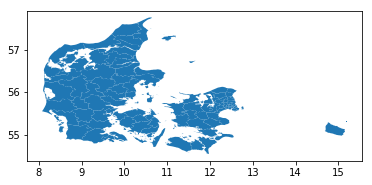

In [37]:
#Including map from http://www.diva-gis.org/datadown (also see bibliography)
shp = gp.GeoDataFrame.from_file('/Users/victoriamariastokholmhundevad/Downloads/DNK_adm/DNK_adm2.shp') 
shp.plot()

In [38]:
#Converting the coordinates to same format
shp.crs = {'init': 'epsg:4326'} 
gdp.crs = {'init': 'epsg:4326'}

dk_rides_dep = gp.tools.sjoin(gdp, shp, how="right", op='intersects')

In [39]:
#Getting number of rides per municipality (here called district) 
num_rides_per_district_dep = dk_rides_dep.groupby("NAME_2").size()
num_rides_per_district_dep = num_rides_per_district_dep.to_frame(name="dep_num").reset_index()

In [40]:
#Merging the dataset with the map of Denmark
dep_df_num = pd.merge(shp, num_rides_per_district_dep, on="NAME_2", how="right")

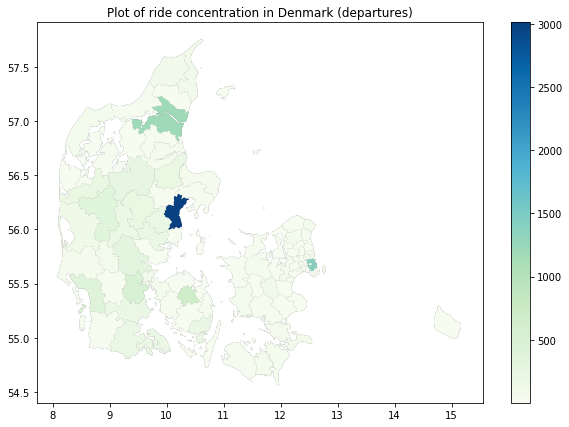

In [41]:
#Creating the figure for total departures
fig, ax = plt.subplots(1, figsize=(10,7))
base = shp.plot(ax=ax, color='gray')
#gdf.plot(ax=base, marker="o", markersize=5, alpha=0.5)
dep_df_num.plot(ax=base, column='dep_num', cmap='GnBu', alpha=1, legend=True)
ax.set_title("Plot of ride concentration in Denmark (departures)")
leg = ax.get_legend()
#Saving figure to use in project document
fig.savefig('departure_blue.png')

# Geopandas for total arrival

In [53]:
#Creating version of dataframe to use for total arrival
sample_arr = df 

In [55]:
# Using the longitude and latitude for departure as coordinates
sample_arr['Coordinates'] = list(zip(sample_arr.longitude_arr, sample_arr.latitude_arr))
sample_arr['Coordinates'] = sample_arr['Coordinates'].apply(Point)
garr = gp.GeoDataFrame(sample_arr, geometry='Coordinates')
garr.head()

,id,depart_date_time,seats,free_seats,user_id,handle_fee_rate,handle_fee_ceiling_factor,accept_cash,accept_online_payment,quick_booking,...,time_minute_hour,time_cat,Night,Morning,Forenoon,Noon,Afternoon,Evening,Late_evening,Coordinates
index_left,,,,,,,,,,,,,,,,,,,,,
0,7385002,2018-08-07T15:30:00+02:00,2,0,269889,12.5,100,False,True,True,...,15.50,Afternoon,0,0,0,0,1,0,0,POINT (9.8968571 56.0251671)
1,7385006,2018-08-07T14:00:00+02:00,3,3,1399528,12.5,100,False,True,True,...,14.00,Noon,0,0,0,1,0,0,0,POINT (12.5683372 55.6760968)
2,7385007,2018-08-09T08:30:00+02:00,1,0,1438456,12.5,100,False,True,True,...,8.50,Morning,0,1,0,0,0,0,0,POINT (9.237394 55.844405)
3,7385010,2018-08-07T06:45:00+02:00,3,3,906186,12.5,100,False,True,True,...,6.75,Morning,0,1,0,0,0,0,0,POINT (8.7034921 56.95916800000001)
4,7385011,2018-08-10T16:15:00+02:00,2,1,2318925,12.5,100,False,True,False,...,16.25,Afternoon,0,0,0,0,1,0,0,POINT (9.5282372 55.7134411)


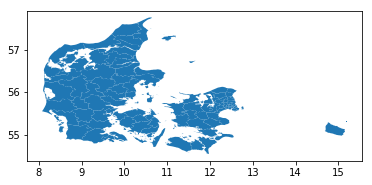

In [57]:
#Including map from http://www.diva-gis.org/datadown (also see bibliography)
shp = gp.GeoDataFrame.from_file('/Users/victoriamariastokholmhundevad/Downloads/DNK_adm/DNK_adm2.shp') #denne virker kun hos Emma - læg op
shp.plot()

In [84]:
#Converting the coordinates to same format
shp.crs = {'init': 'epsg:4326'} 
garr.crs = {'init': 'epsg:4326'}

dk_rides_arr = gp.tools.sjoin(garr, shp, how="right", op='intersects')
dk_rides_arr.head()

,index_left,id,depart_date_time,seats,free_seats,user_id,handle_fee_rate,handle_fee_ceiling_factor,accept_cash,accept_online_payment,...,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
index_right,,,,,,,,,,,,,,,,,,,,,
44,0.0,7385002.0,2018-08-07T15:30:00+02:00,2.0,0.0,269889.0,12.5,100.0,False,True,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,5.0,7385035.0,2018-08-06T20:30:00+02:00,3.0,3.0,734681.0,12.5,100.0,False,True,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,149.0,7385709.0,2018-08-07T12:40:00+02:00,5.0,0.0,57855.0,12.5,100.0,False,True,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,211.0,7386006.0,2018-08-07T07:30:00+02:00,3.0,3.0,541988.0,12.5,100.0,False,True,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,242.0,7386127.0,2018-08-07T10:20:00+02:00,2.0,2.0,267139.0,12.5,100.0,False,True,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...


In [61]:
#Getting number of rides per district
num_rides_per_district_arr = dk_rides_arr.groupby("NAME_2").size()
num_rides_per_district_arr = num_rides_per_district_arr.to_frame(name="arr_num").reset_index()
num_rides_per_district_arr.head()


,NAME_2,arr_num
0,Aabenraa,164
1,Aalborg,1168
2,Albertslund,106
3,Allerød,10
4,Assens,41


In [62]:
#Establishing cut categories
arr_ride_num = pd.merge(shp, num_rides_per_district_arr, on="NAME_2", how="right")

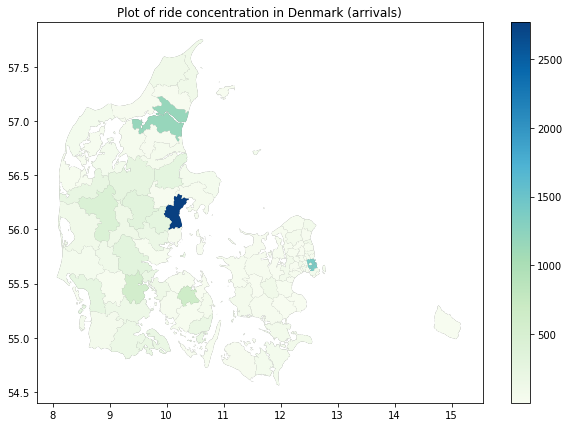

In [63]:
#Plotting total number of arrivals in Denmark
fig, ax = plt.subplots(1, figsize=(10,7))
base = shp.plot(ax=ax, color='gray')
#gdf.plot(ax=base, marker="o", markersize=5, alpha=0.5)
arr_ride_num.plot(ax=base, column='arr_num',cmap='GnBu', alpha=1, legend=True)
ax.set_title("Plot of ride concentration in Denmark (arrivals)")
leg = ax.get_legend()
fig.savefig('arrival.png')

# Plotting drives per capita in Municipalities

In [65]:
#Creating the new dataframe with population data and renaming the values, that do not match our geomap. This will be used for both departure and arrival
pop_mun = pd.read_excel('/Users/victoriamariastokholmhundevad/Desktop/Egen kopi 1/201882810298227085411BY2.xlsx', index_col=None)
pop_mun.to_csv('pop_mun.csv', encoding='utf-8')
pop_mun = pd.read_csv('pop_mun.csv')
pop_mun = pop_mun.dropna().reset_index(drop=True)
pop_mun = pop_mun.drop('Unnamed: 0', 1)
pop_mun.columns = ['NAME_2', 'Pop']
pop_mun.at[79, 'NAME_2'] = 'Århus'
pop_mun.at[97, 'NAME_2'] = 'Vesthimmerland'
pop_mun.at[12, 'NAME_2'] = 'Høje Taastrup'
print(pop_mun.head())

          NAME_2       Pop
0      København  613288.0
1  Frederiksberg  104410.0
2         Dragør   14272.0
3         Tårnby   43063.0
4    Albertslund   27743.0


In [66]:
#Creating the sample for relative departures
sample_pcd = df

In [85]:
# Using the longitude and latitude for departure as coordinates
sample_pcd['Coordinates'] = list(zip(sample_pcd.longitude_dep, sample_pcd.latitude_dep))
sample_pcd['Coordinates'] = sample_pcd['Coordinates'].apply(Point)
gdp_pcd = gp.GeoDataFrame(sample_pcd, geometry='Coordinates')
gdp_pcd.head()

,id,depart_date_time,seats,free_seats,user_id,handle_fee_rate,handle_fee_ceiling_factor,accept_cash,accept_online_payment,quick_booking,...,time_minute_hour,time_cat,Night,Morning,Forenoon,Noon,Afternoon,Evening,Late_evening,Coordinates
index_left,,,,,,,,,,,,,,,,,,,,,
0,7385002,2018-08-07T15:30:00+02:00,2,0,269889,12.5,100,False,True,True,...,15.50,Afternoon,0,0,0,0,1,0,0,POINT (12.465726 55.673514)
1,7385006,2018-08-07T14:00:00+02:00,3,3,1399528,12.5,100,False,True,True,...,14.00,Noon,0,0,0,1,0,0,0,POINT (10.036539 56.460584)
2,7385007,2018-08-09T08:30:00+02:00,1,0,1438456,12.5,100,False,True,True,...,8.50,Morning,0,1,0,0,0,0,0,POINT (12.5381179 55.657333)
3,7385010,2018-08-07T06:45:00+02:00,3,3,906186,12.5,100,False,True,True,...,6.75,Morning,0,1,0,0,0,0,0,POINT (8.589933 56.48493000000001)
4,7385011,2018-08-10T16:15:00+02:00,2,1,2318925,12.5,100,False,True,False,...,16.25,Afternoon,0,0,0,0,1,0,0,POINT (10.1848928 56.188259)


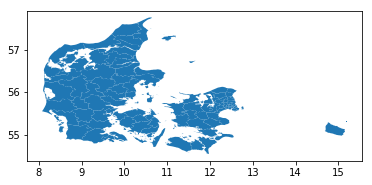

In [68]:
#Including map from http://www.diva-gis.org/datadown (also see bibliography)
shp = gp.GeoDataFrame.from_file('/Users/victoriamariastokholmhundevad/Downloads/DNK_adm/DNK_adm2.shp') #denne virker kun hos Emma - læg op
shp.plot()

In [69]:
#Converting the coordinates to same format
shp.crs = {'init': 'epsg:4326'} 
gdp_pcd.crs = {'init': 'epsg:4326'}

dk_rides = gp.tools.sjoin(gdp_pcd, shp, how="right", op='intersects')

In [87]:
#Getting number of rides per municipality
num_rides_per_district_dep_pcd = dk_rides.groupby("NAME_2").size()
num_rides_per_district_dep_pcd = num_rides_per_district_dep_pcd.to_frame(name="dep_num").reset_index()

In [71]:
#Merging the dataset of geo with numbers
new_df_dep_pcd = pd.merge(pop_mun, num_rides_per_district_dep_pcd, how='left', on=['NAME_2'])
new_df_dep_pcd.head()

,NAME_2,Pop,dep_num
0,København,613288.0,1407
1,Frederiksberg,104410.0,148
2,Dragør,14272.0,2
3,Tårnby,43063.0,53
4,Albertslund,27743.0,102


In [88]:
#Creating new variable: departures per capita in municipality
new_df_dep_pcd['per_capita'] = new_df_dep_pcd['dep_num']*1/new_df_dep_pcd['Pop']*1
#print(new_df_dep.head)
#Merging new dataset with map of Denmark
dep_df_num_pcd = pd.merge(shp, new_df_dep_pcd, on="NAME_2", how="right")

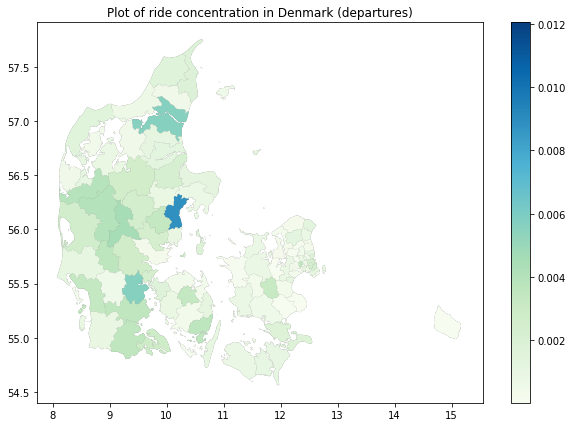

In [73]:
#Creating plot of arrivals per capita in municipality
fig, ax = plt.subplots(1, figsize=(10,7))
base = shp.plot(ax=ax, color='gray')
#gdf.plot(ax=base, marker="o", markersize=5, alpha=0.5)
dep_df_num_pcd.plot(ax=base, column='per_capita', cmap='GnBu', alpha=1, legend=True)
ax.set_title("Plot of ride concentration in Denmark (departures)")
leg = ax.get_legend()
fig.savefig('departure_per_capita.png')

# Plotting relative arrivals per capita in municipalities

In [83]:
#Creating the sample for relative arrivals
sample_PCA = df 

In [86]:
# Using the longitude and latitude for departure as coordinates
sample_PCA['Coordinates'] = list(zip(sample_PCA.longitude_arr, sample_PCA.latitude_arr))
sample_PCA['Coordinates'] = sample_PCA['Coordinates'].apply(Point)
garr = gp.GeoDataFrame(sample_PCA, geometry='Coordinates')
garr.head()

,id,depart_date_time,seats,free_seats,user_id,handle_fee_rate,handle_fee_ceiling_factor,accept_cash,accept_online_payment,quick_booking,...,time_minute_hour,time_cat,Night,Morning,Forenoon,Noon,Afternoon,Evening,Late_evening,Coordinates
index_left,,,,,,,,,,,,,,,,,,,,,
0,7385002,2018-08-07T15:30:00+02:00,2,0,269889,12.5,100,False,True,True,...,15.50,Afternoon,0,0,0,0,1,0,0,POINT (9.8968571 56.0251671)
1,7385006,2018-08-07T14:00:00+02:00,3,3,1399528,12.5,100,False,True,True,...,14.00,Noon,0,0,0,1,0,0,0,POINT (12.5683372 55.6760968)
2,7385007,2018-08-09T08:30:00+02:00,1,0,1438456,12.5,100,False,True,True,...,8.50,Morning,0,1,0,0,0,0,0,POINT (9.237394 55.844405)
3,7385010,2018-08-07T06:45:00+02:00,3,3,906186,12.5,100,False,True,True,...,6.75,Morning,0,1,0,0,0,0,0,POINT (8.7034921 56.95916800000001)
4,7385011,2018-08-10T16:15:00+02:00,2,1,2318925,12.5,100,False,True,False,...,16.25,Afternoon,0,0,0,0,1,0,0,POINT (9.5282372 55.7134411)


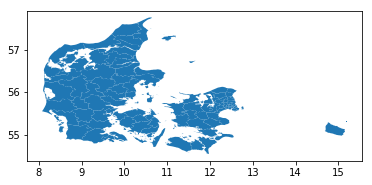

In [76]:
#Including map from http://www.diva-gis.org/datadown (also see bibliography)
shp = gp.GeoDataFrame.from_file('/Users/victoriamariastokholmhundevad/Downloads/DNK_adm/DNK_adm2.shp') #denne virker kun hos Emma - læg op
shp.plot()

In [77]:
#Converting the coordinates to same format
shp.crs = {'init': 'epsg:4326'} 
garr.crs = {'init': 'epsg:4326'}

dk_rides__PCA = gp.tools.sjoin(garr, shp, how="right", op='intersects')
dk_rides__PCA

,index_left,id,depart_date_time,seats,free_seats,user_id,handle_fee_rate,handle_fee_ceiling_factor,accept_cash,accept_online_payment,...,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
index_right,,,,,,,,,,,,,,,,,,,,,
44,0.0,7385002.0,2018-08-07T15:30:00+02:00,2.0,0.0,269889.0,12.5,100.0,False,True,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,5.0,7385035.0,2018-08-06T20:30:00+02:00,3.0,3.0,734681.0,12.5,100.0,False,True,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,149.0,7385709.0,2018-08-07T12:40:00+02:00,5.0,0.0,57855.0,12.5,100.0,False,True,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,211.0,7386006.0,2018-08-07T07:30:00+02:00,3.0,3.0,541988.0,12.5,100.0,False,True,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,242.0,7386127.0,2018-08-07T10:20:00+02:00,2.0,2.0,267139.0,12.5,100.0,False,True,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,243.0,7386133.0,2018-08-07T16:00:00+02:00,2.0,2.0,814817.0,12.5,100.0,False,True,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,247.0,7386147.0,2018-08-07T13:30:00+02:00,2.0,2.0,56642.0,12.5,100.0,False,True,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,255.0,7386173.0,2018-08-08T10:25:00+02:00,2.0,2.0,267139.0,12.5,100.0,False,True,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...
44,261.0,7386185.0,2018-08-09T10:25:00+02:00,2.0,2.0,267139.0,12.5,100.0,False,True,...,Denmark,2,Midtjylland,45,Skanderborg,Kommune,Municipality,None,None,(POLYGON ((10.01367568969732 55.98131561279308...


In [78]:
#Getting number of rides per municipality
num_rides_per_district_PCA = dk_rides__PCA.groupby("NAME_2").size()
num_rides_per_district_PCA = num_rides_per_district_PCA.to_frame(name="arr_num").reset_index()
num_rides_per_district_PCA.head()

,NAME_2,arr_num
0,Aabenraa,164
1,Aalborg,1168
2,Albertslund,106
3,Allerød,10
4,Assens,41


In [79]:
#Merging the dataset of geo with numbers
new_df_PCA = pd.merge(pop_mun, num_rides_per_district_PCA, how='left', on=['NAME_2'])

In [80]:
#Creating new variable: arrival per capita in municipality
new_df_PCA['per_capita'] = new_df_PCA['arr_num']*1/new_df_PCA['Pop']*1
new_df_PCA.head()

,NAME_2,Pop,arr_num,per_capita
0,København,613288.0,1402,0.002286
1,Frederiksberg,104410.0,110,0.001054
2,Dragør,14272.0,3,0.000210
3,Tårnby,43063.0,64,0.001486
4,Albertslund,27743.0,106,0.003821


In [81]:
#Merging new dataset with map of Denmark
arr_ride_num_PCA = pd.merge(shp, new_df_PCA, on="NAME_2", how="right")

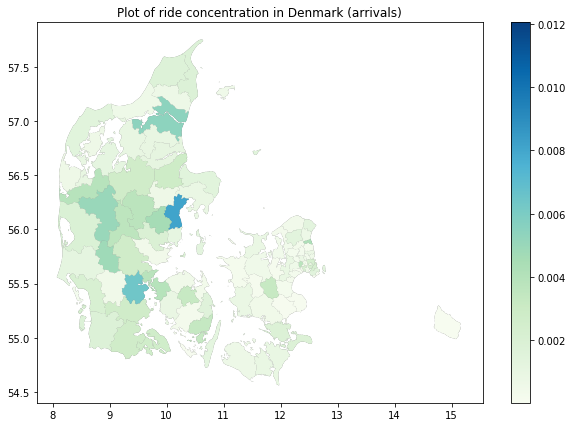

In [82]:
#Creating plot of arrivals per capita in municipality
fig, ax = plt.subplots(1, figsize=(10,7))
base = shp.plot(ax=ax, color='gray')
#gdf.plot(ax=base, marker="o", markersize=5, alpha=0.5)
arr_ride_num_PCA.plot(ax=base, column='per_capita', cmap='GnBu', alpha=1, legend=True)
ax.set_title("Plot of ride concentration in Denmark (arrivals)")
leg = ax.get_legend()
fig.savefig('arrival_per_capita.png')

# Descriptive analysis